In [5]:
#importing libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Reading Data
net=pd.read_csv('netflix1.csv')

In [7]:
net.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [8]:
net.shape

(8790, 10)

In [9]:
#checking null values in the dataset 
net.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [10]:
#Cleaning show_id
net['show_id']=net['show_id'].str.replace('s','').astype(int)
#Netflix_data['show_id'] = Netflix_data['show_id'].str.replace('s', '').astype(int)

In [11]:
net.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [12]:
#Changing data type of date_added column
net['date_added']=pd.to_datetime(net['date_added'],format='%m/%d/%Y')
#tfl_df['Day']=p.to_datetime(tfl_df['Day'],format='%d/%m/%Y')

In [13]:
#Added new column for year by cleaning date
net['Year_added']=net['date_added'].dt.strftime('%Y')
#tfl_df['Day']=tfl_df['Day'].dt.strftime('%Y-%m')

In [49]:
net.dtypes

show_id                  int32
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
Year_added              object
dtype: object

In [54]:
#Search for duplicates
counts=net['title'].value_counts()

In [55]:
counts

9-Feb                   2
15-Aug                  2
22-Jul                  2
Dick Johnson Is Dead    1
SGT. Will Gardner       1
                       ..
Mercy Black             1
The Trap                1
Pinky Memsaab           1
Love O2O                1
YOM                     1
Name: title, Length: 8787, dtype: int64

In [14]:
#Drop duplicates
net=net.drop_duplicates(subset=['title'])

In [15]:
#check if duplicates are dropped correctly
net['title'].value_counts()

Dick Johnson Is Dead                 1
SGT. Will Gardner                    1
Septiembre, un llanto en silencio    1
Set Up                               1
Sex and the City 2                   1
                                    ..
Mercy Black                          1
The Trap                             1
Pinky Memsaab                        1
Love O2O                             1
YOM                                  1
Name: title, Length: 8787, dtype: int64

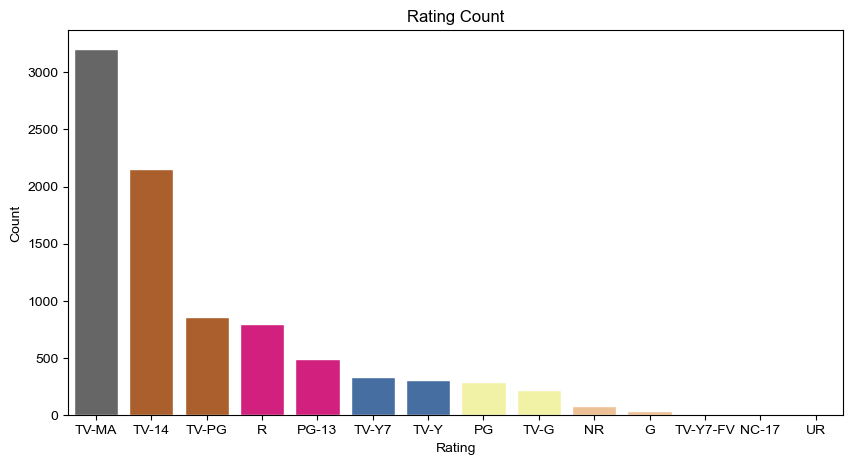

In [16]:
#Countplot on Rating
ax=plt.subplots(figsize=(10,5))
sns.set_theme(style='whitegrid')  #white, dark, whitegrid, darkgrid, ticks
ax=sns.countplot(x=net['rating'],palette='Accent_r',
order=net['rating'].value_counts().index,data=net)
ax.set_title('Rating Count')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Pie Chart of the Type of Netflix Content')

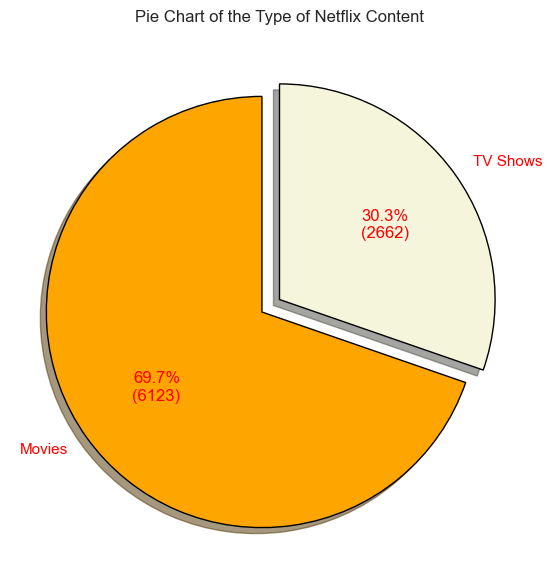

In [32]:
# Pie Chart Of The Type Of Shows On Netflix
data = net['type'].value_counts()
wp={'linewidth':1,'edgecolor':"black"}
colors=('orange','beige')

def my_func(pct,allvalues):
    absolute=int(pct/100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig,ax=plt.subplots(figsize=(10,7))
wedges,texts,autotexts=ax.pie(data,
                              autopct=lambda pct: func(pct, data),
                              labels=['Movies', 'TV Shows'],
                              shadow=True,
                              explode=(0.1,0),
                              wedgeprops=wp,
                              startangle = 90,
                              colors = colors,
                              textprops = dict(color="red"))
ax.set_title('Pie Chart of the Type of Netflix Content')

AttributeError: 'Rectangle' object has no attribute 'get_xx'

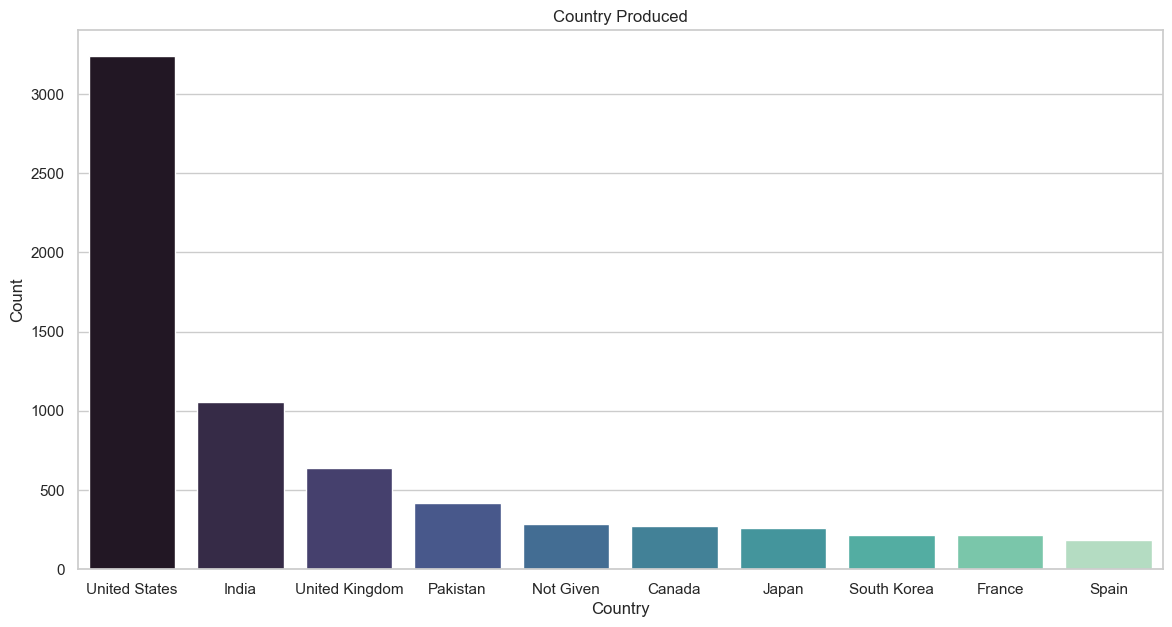

In [41]:
# Countplot Of Country With The Most Produced Content On Netflix
countplot,ax=plt.subplots(figsize=(14,7))
ax=sns.countplot(x=net['country'],
                 order=net['country'].value_counts().head(10).index,
                 palette='mako')

ax.set_title('Country Produced')
ax.set_xlabel('Country')
ax.set_ylabel('Count')

for rect in ax.patches:
    ax.text(rect.get_xx()+rect.get_width()/2,
            rect.get_height()+0.75,
            rect.get_height(),
            horizontalalignment='center',
           fontsize=11)


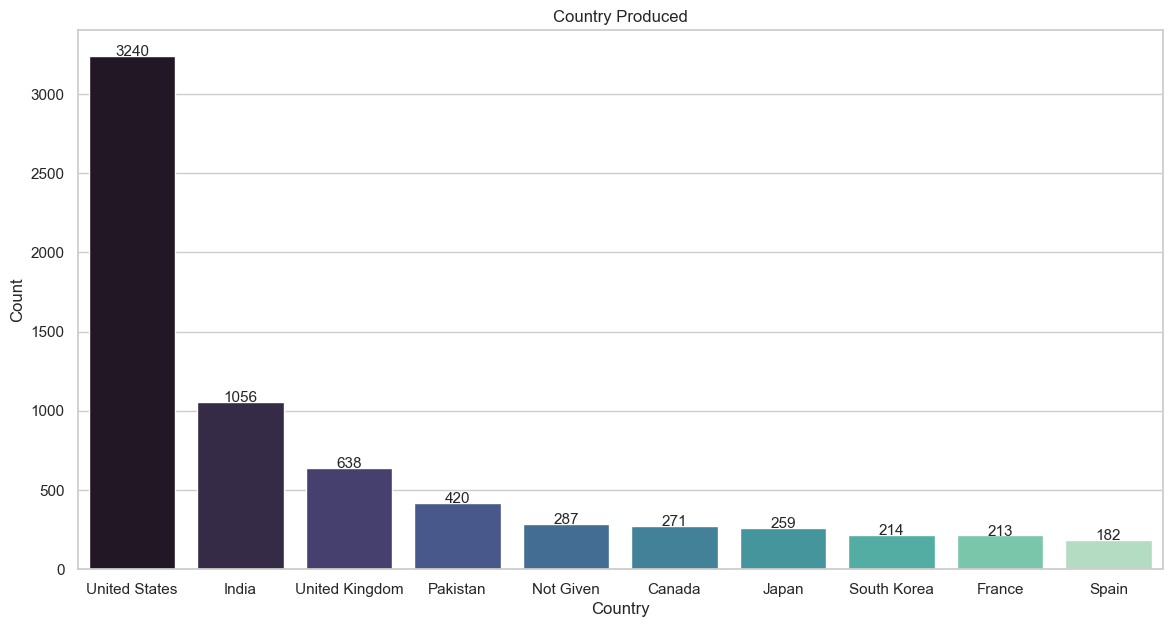

In [39]:
# Countplot Of Country With The Most Produced Content On Netflix
countplt, ax = plt.subplots(figsize = (14,7))
ax = sns.countplot(x=net['country'],
                   order = net['country'].value_counts().head(10).index, 
                   palette='mako')

ax.set_title('Country Produced')
ax.set_xlabel('Country')
ax.set_ylabel('Count')

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()/2,
             rect.get_height()+ 0.75,
             rect.get_height(),
             horizontalalignment='center',
             fontsize = 11)

Text(0.5, 0, 'Year')

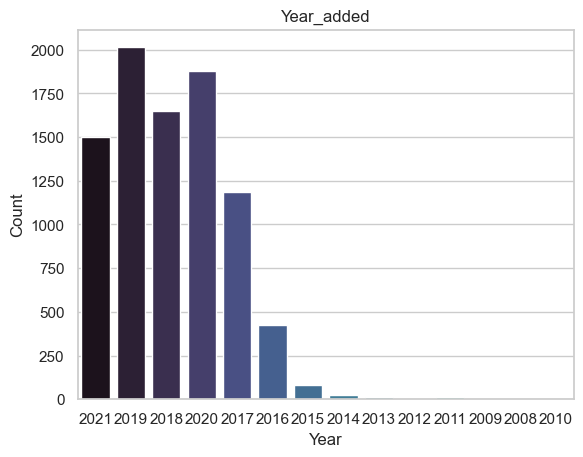

In [47]:
# Count Plot Of The year_added To Netflix
ax=sns.countplot(x=net['Year_added'],
                 palette='mako')
ax.set_title('Year_added')
ax.set_ylabel('Count')
ax.set_xlabel('Year')

In [45]:
net.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,Year_added
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021
1,3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021
2,6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021
3,14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021
4,8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021
